<a href="https://colab.research.google.com/github/JonamManoj/big-data-2/blob/main/Copy_of_BigDataAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
# Load datasets
train_data = pd.read_csv('trainData.csv')
test_data = pd.read_csv('testData.csv')

In [6]:
# Identify null fields and show unique values
print("Training Data Null Fields and Unique Values:")
for column in train_data.columns:
    print(f"{column}:")
    print(f"    Null Values: {train_data[column].isnull().sum()}")
    print(f"    Unique Values: {train_data[column].nunique()}")

print("\nTest Data Null Fields and Unique Values:")
for column in test_data.columns:
    print(f"{column}:")
    print(f"    Null Values: {test_data[column].isnull().sum()}")
    print(f"    Unique Values: {test_data[column].nunique()}")

Training Data Null Fields and Unique Values:
id:
    Null Values: 226067
    Unique Values: 0
member_id:
    Null Values: 226067
    Unique Values: 0
loan_amnt:
    Null Values: 0
    Unique Values: 1516
int_rate:
    Null Values: 0
    Unique Values: 612
installment:
    Null Values: 0
    Unique Values: 42818
grade:
    Null Values: 0
    Unique Values: 7
emp_length:
    Null Values: 14611
    Unique Values: 11
home_ownership:
    Null Values: 0
    Unique Values: 6
annual_inc:
    Null Values: 0
    Unique Values: 17143
loan_status:
    Null Values: 0
    Unique Values: 9
dti:
    Null Values: 180
    Unique Values: 5850
delinq_2yrs:
    Null Values: 5
    Unique Values: 24
inq_last_6mths:
    Null Values: 5
    Unique Values: 14
mths_since_last_delinq:
    Null Values: 115840
    Unique Values: 135
open_acc:
    Null Values: 5
    Unique Values: 71
pub_rec:
    Null Values: 5
    Unique Values: 22
revol_bal:
    Null Values: 0
    Unique Values: 49317
revol_util:
    Null Values: 1

In [7]:
# Remove unwanted columns
unwanted_columns = ['id', 'member_id']
train_data.drop(columns=unwanted_columns, inplace=True)
test_data.drop(columns=unwanted_columns, inplace=True)

In [8]:
# Handle missing values
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        test_data[column].fillna(test_data[column].mean(), inplace=True)

In [9]:
train_data.head(10)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,18600,10.99,608.86,B,6 years,RENT,80000.00,Fully Paid,12.92,0.0,...,0.0,0.00,0.0000,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,2000,17.97,72.28,D,4 years,MORTGAGE,55400.00,Current,10.62,1.0,...,0.0,0.00,0.0000,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,12000,12.29,400.24,C,10+ years,OWN,60000.00,Fully Paid,17.92,0.0,...,0.0,0.00,0.0000,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,16000,19.42,589.90,D,7 years,RENT,64000.00,Current,3.90,1.0,...,0.0,0.00,0.0000,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.00,Fully Paid,19.08,1.0,...,0.0,0.00,0.0000,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
5,19000,16.99,472.10,D,1 year,RENT,65000.00,Charged Off,15.66,0.0,...,0.0,1863.64,335.4552,472.10,0.0,Individual,0.0,234.0,13167.0,24600.0
6,6000,9.17,191.28,B,10+ years,OWN,147000.00,Fully Paid,4.00,1.0,...,0.0,0.00,0.0000,152.92,0.0,Individual,0.0,381.0,2686.0,12400.0
7,17000,5.32,511.96,A,10+ years,MORTGAGE,75000.00,Current,7.89,0.0,...,0.0,0.00,0.0000,511.96,0.0,Individual,0.0,0.0,191633.0,45700.0
8,26375,24.50,766.43,F,10+ years,MORTGAGE,71596.18,Fully Paid,22.59,0.0,...,0.0,0.00,0.0000,14426.38,0.0,Individual,0.0,510.0,273060.0,19900.0
9,10000,18.45,256.39,D,4 years,RENT,48000.00,Current,28.03,0.0,...,0.0,0.00,0.0000,256.39,0.0,Individual,0.0,0.0,132034.0,38100.0


In [10]:
# Create target variable y
train_data['y'] = np.where(train_data['loan_status'] == 'Charged Off', 1, 0)
test_data['y'] = np.where(test_data['loan_status'] == 'Charged Off', 1, 0)

In [11]:
# Drop the 'loan_status' column
train_data.drop(columns=['loan_status'], inplace=True)
test_data.drop(columns=['loan_status'], inplace=True)

In [12]:
# Encode categorical variables
categorical_cols = train_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

In [13]:
# Feature scaling
scaler = StandardScaler()
scaled_train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
scaled_test_data = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)

In [14]:
# Separate predictors and target
X_train = scaled_train_data.drop(columns=['y'])
y_train = scaled_train_data['y']
X_test = scaled_test_data.drop(columns=['y'])
y_test = scaled_test_data['y']

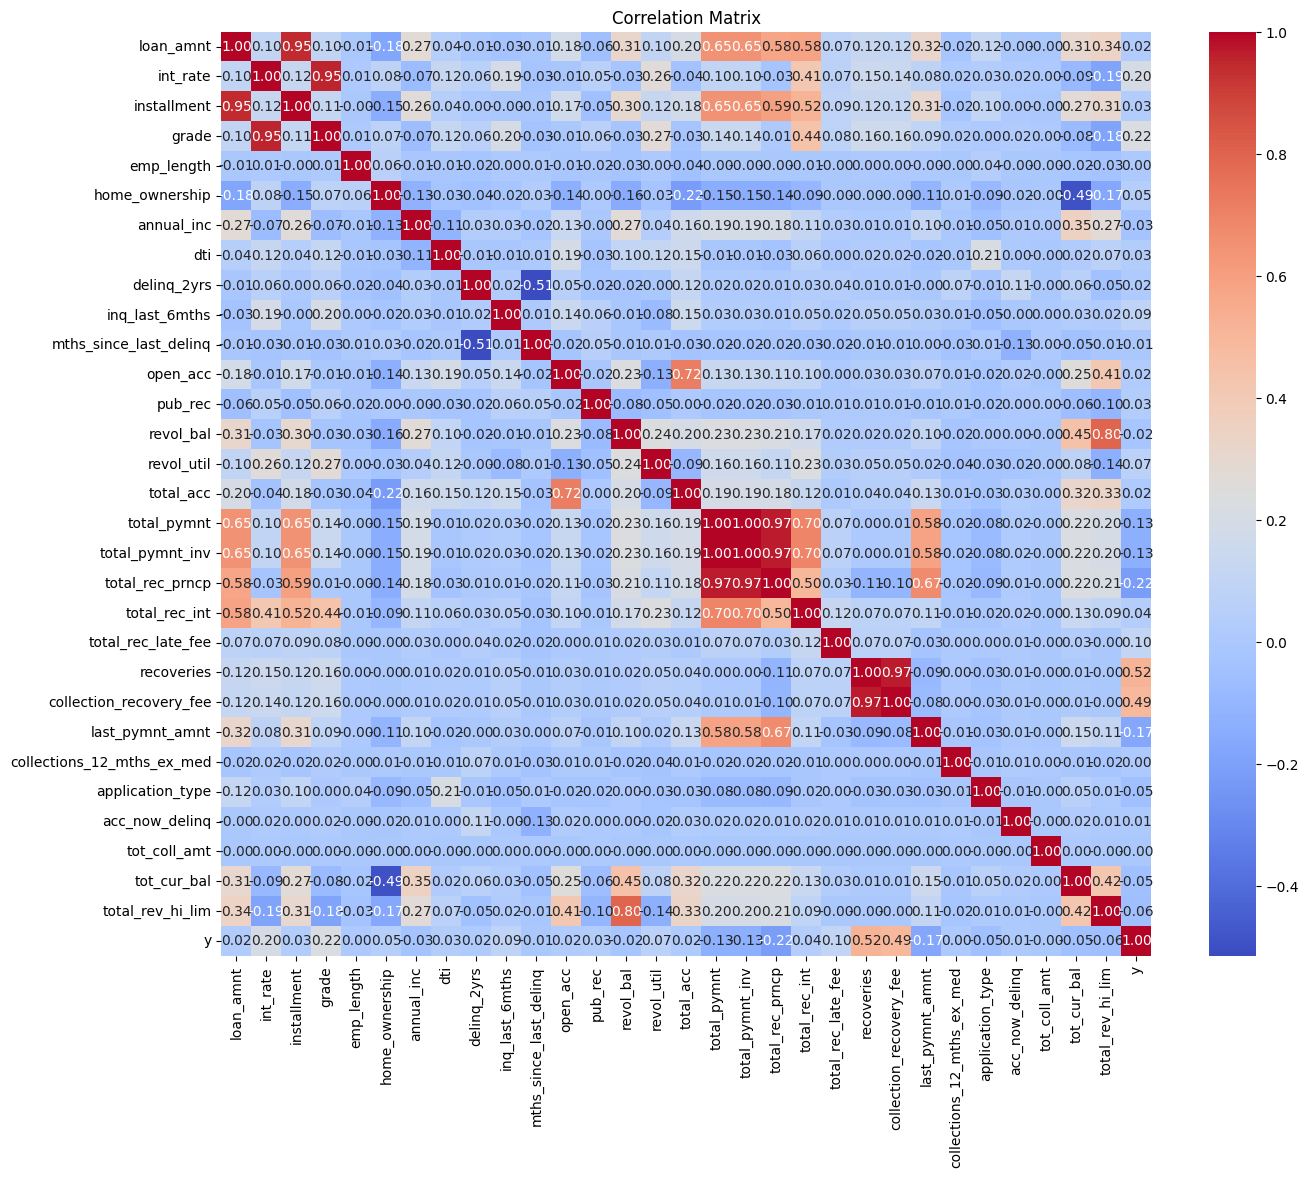

In [15]:
# Correlation analysis
correlation_matrix = train_data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Identify top 10 most correlated and least correlated features with the target variable 'y'
corr_with_target = correlation_matrix['y'].sort_values(ascending=False)
top_10_corr = corr_with_target.head(11).drop('y')
bottom_10_corr = corr_with_target.tail(10)

In [17]:
print("Top 10 most correlated features with target variable 'y':")
print(top_10_corr)
print("\nBottom 10 least correlated features with target variable 'y':")
print(bottom_10_corr)

Top 10 most correlated features with target variable 'y':
recoveries                 0.516998
collection_recovery_fee    0.492596
grade                      0.222951
int_rate                   0.198602
total_rec_late_fee         0.101508
inq_last_6mths             0.087960
revol_util                 0.067855
home_ownership             0.046983
total_rec_int              0.038422
dti                        0.034656
Name: y, dtype: float64

Bottom 10 least correlated features with target variable 'y':
mths_since_last_delinq   -0.005520
revol_bal                -0.018616
annual_inc               -0.033715
tot_cur_bal              -0.050218
application_type         -0.051467
total_rev_hi_lim         -0.056569
total_pymnt_inv          -0.132253
total_pymnt              -0.132429
last_pymnt_amnt          -0.174919
total_rec_prncp          -0.216278
Name: y, dtype: float64


Linear Regression MSE (train): 0.6645811790378359
Linear Regression MSE (test): 0.6723030614722801


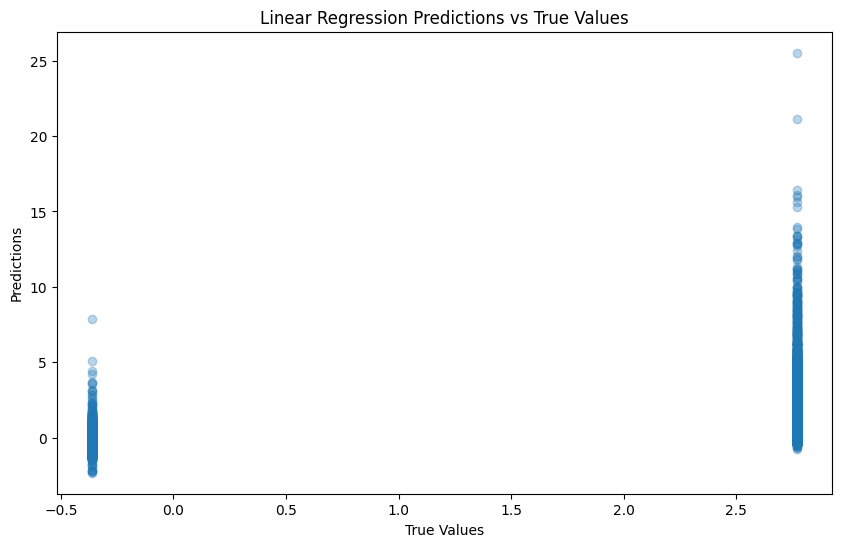

In [18]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
train_preds_lr = lr.predict(X_train)
test_preds_lr = lr.predict(X_test)
mse_train_lr = mean_squared_error(y_train, train_preds_lr)
mse_test_lr = mean_squared_error(y_test, test_preds_lr)
print(f'Linear Regression MSE (train): {mse_train_lr}')
print(f'Linear Regression MSE (test): {mse_test_lr}')
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_preds_lr, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions vs True Values')
plt.show()

Random Forest MSE (train): 0.028013618071922035
Random Forest MSE (test): 0.1995930223917451


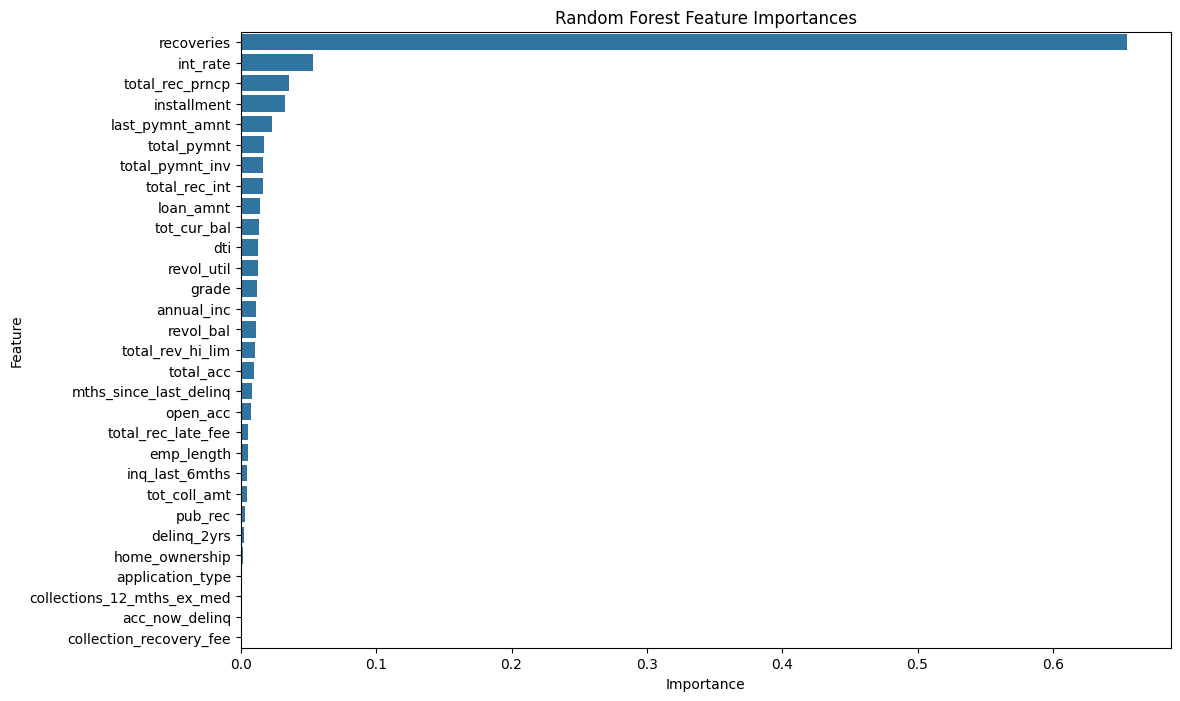

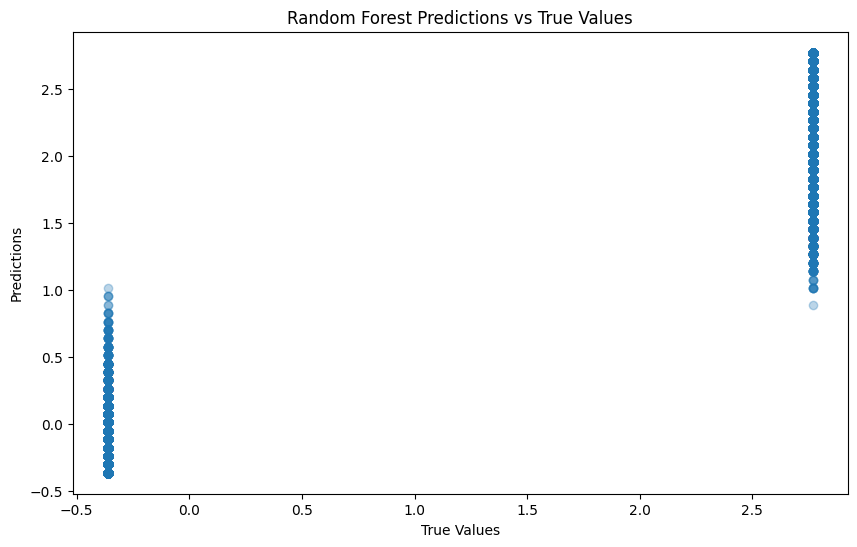

In [19]:

# Random Forest Model
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
train_preds_rf = rf.predict(X_train)
test_preds_rf = rf.predict(X_test)
mse_train_rf = mean_squared_error(y_train, train_preds_rf)
mse_test_rf = mean_squared_error(y_test, test_preds_rf)
feature_importances = rf.feature_importances_
print(f'Random Forest MSE (train): {mse_train_rf}')
print(f'Random Forest MSE (test): {mse_test_rf}')
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Random Forest Feature Importances')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_preds_rf, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Predictions vs True Values')
plt.show()

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Lasso Regression MSE (train): 0.6705209566387138
Lasso Regression MSE (test): 0.6791004713606322


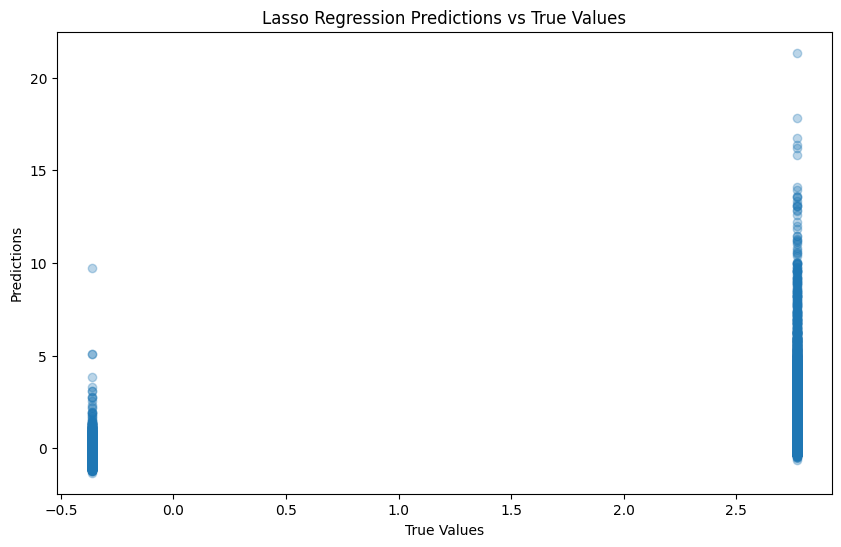

In [20]:
# Lasso Regression Model
lasso = Lasso()
params = {'alpha': np.arange(0.01, 3.01, 0.01)}
lasso_cv = GridSearchCV(lasso, param_grid=params,  scoring='neg_mean_squared_error', cv=5, verbose=1,refit=True)
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_  # Use best_estimator_ instead of estimator()

# Make predictions on training and test sets
train_preds_lasso = best_lasso.predict(X_train)
test_preds_lasso = best_lasso.predict(X_test)
mse_train_lasso = mean_squared_error(y_train, train_preds_lasso)
mse_test_lasso = mean_squared_error(y_test, test_preds_lasso)
print(f'Lasso Regression MSE (train): {mse_train_lasso}')
print(f'Lasso Regression MSE (test): {mse_test_lasso}')
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_preds_lasso, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression Predictions vs True Values')
plt.show()

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Ridge Regression MSE (train): 0.6645858504988845
Ridge Regression MSE (test): 0.672304735348488


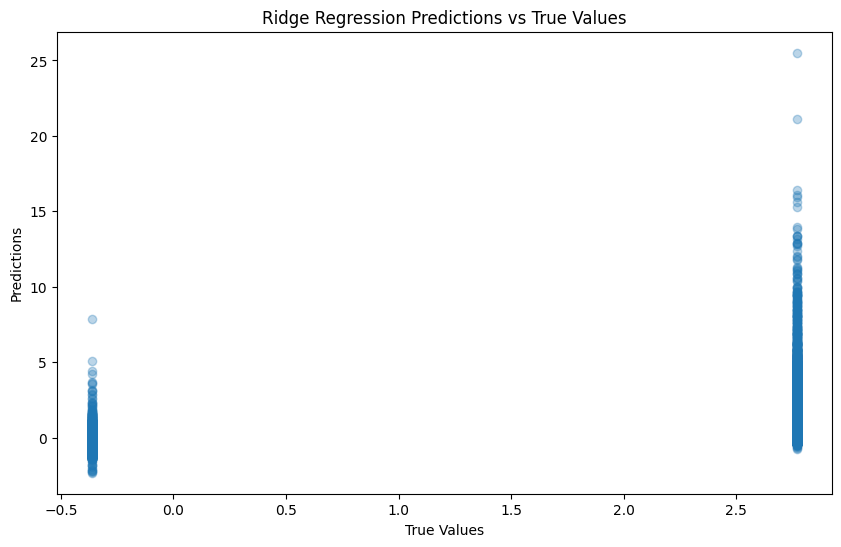

In [21]:
# Ridge Regression Model
ridge = Ridge()
params = {'alpha': np.arange(0.01, 3.01, 0.01)}
ridge_cv = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=1, refit=True)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
train_preds_ridge = best_ridge.predict(X_train)
test_preds_ridge = best_ridge.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, train_preds_ridge)
mse_test_ridge = mean_squared_error(y_test, test_preds_ridge)
print(f'Ridge Regression MSE (train): {mse_train_ridge}')
print(f'Ridge Regression MSE (test): {mse_test_ridge}')
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_preds_ridge, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression Predictions vs True Values')
plt.show()

In [22]:
# Neural Network Model
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
train_preds_nn = nn.predict(X_train)
test_preds_nn = nn.predict(X_test)
mse_train_nn = mean_squared_error(y_train, train_preds_nn)
mse_test_nn = mean_squared_error(y_test, test_preds_nn)
accuracy_train_nn = nn.score(X_train, y_train)
accuracy_test_nn = nn.score(X_test, y_test)
print(f'Neural Network MSE (train): {mse_train_nn}')
print(f'Neural Network MSE (test): {mse_test_nn}')
print(f'Neural Network Accuracy (train): {accuracy_train_nn}')
print(f'Neural Network Accuracy (test): {accuracy_test_nn}')

Neural Network MSE (train): 0.3832709217945067
Neural Network MSE (test): 0.3339549112116241
Neural Network Accuracy (train): 0.6167290782054933
Neural Network Accuracy (test): 0.6671752498001723
